# 오픈 cv을 이용한 이미지 처리

컬러 이미지를 변환, 이미지 크기 변환, 이미지 잘라내기 등을 할 수 있음

opencv를 이용하여 이미지를 가공하는 작업을 할 것임.

In [4]:
pip install opencv-python

     |████████████████████████████████| 46.4 MB 35.5 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [9]:
import cv2
img = cv2.imread("/Users/choeunsol/Python/나도코딩 - 파이썬 스터디/opencv/img1.jpeg") # 해당 경로의 파일 읽어오기
cv2.imshow("img", img) # img라는 이름의 창에 img를 표시
cv2.waitKey(5000) # 지정된 시간 동안 사용자 키 입력  
## 5000이면 5초 동안 대기하고 다음 코드로 입력
cv2.destroyAllWindows() # 모든 창 닫기

### 읽기 옵션

    1. cv2.IMREAD_COLOR : 컬러 이미지, 투명 영역은 무시(기본값)
    2. cv2.IMREAD_GRAYSCALE : 흑백 이미지
    3. cv2.IMREAD_UNCHANGED : 투명 영역까지 포함

In [4]:
import os, sys
import cv2
os.chdir("/Users/choeunsol/Python/나도코딩 - 파이썬 스터디/opencv")
sys.path.append(os.pardir)
img_color = cv2.imread("img1.jpeg", cv2.IMREAD_COLOR)
img_gray = cv2.imread("img1.jpeg", cv2.IMREAD_GRAYSCALE)
cv2.imshow("img_color", img_color)
cv2.imshow("img_gray", img_gray)
cv2.waitKey(5000)
cv2.destroyAllWindows()

코드를 실행하면 COLOR와 GRAYSCALE이 컬러와 흑백 사진으로 나타나는 것을 알 수 있다.

### Shape

In [5]:
import cv2
img = cv2.imread("img1.jpeg")
img.shape # 세로, 가로, 채널 정보를 알 수 있다.

(781, 1280, 3)

## 동영상 출력

### 동영상 파일 출력

In [9]:
import cv2
cap = cv2.VideoCapture("video1.mp4")

## 반복적으로 화면 캡쳐를 가져온다

while cap.isOpened(): # cap이 제대로 열리는 동안, while은 조건문이 참인 동안에 조건문 아래에 있는 것들을 반복해서 처리해준다.
    ret, frame = cap.read() # ret : 성공 여부, frame : 받아온 이미지(프레임)
    if not ret:
        print("더 이상 가져올 프레임이 없어요.")
        break
    cv2.imshow('video', frame)
    
    if cv2.waitKey(1) == ord('q'):
    # 각 프레임 당 waitKey() 안에 있는 시간만큼 대기한다.
        print("사용자 입력에 의해 종료합니다.")
        break

cap.release() # 자원 반환
cv2.destroyAllWindows()

더 이상 가져올 프레임이 없어요.


### 카메라 출력

In [1]:
import cv2
cap = cv2.VideoCapture(0) # 0번째 카메라 장치 (Device 0)

if not cap.isOpened(): # 비디오 캡쳐가 준비되었는지 확인, 확인이 되지 않은 경우는
    exit() # 프로그램 종료
    
while True: # 무한반복으로 계속 열린다.
    ret, frame = cap.read() # 비디오 캡쳐가 제대로 진행되는지의 인수가 ret, 프레임이 frame
    if not ret:
        break
    
    cv2.imshow('camera', frame)
    if cv2.waitKey(1) == ord('q'): # 사용자가 q를 입력하면 종료
        break

cap.release() # 자원 반환 
cv2.destroyAllWindows()

KeyboardInterrupt: 

무슨 이유인지 q를 눌러도 창이 종료 안됨 ㅠㅠ

## 도형 그리기

얼굴 부분에 사각형, 원 / 사물 인식 시 위치 표시 시 도형을 쓸 수 있다.

### 빈 스케치북 만들기

보다 깔끔한 환경에서 눈으로 보기 쉽게 하기 위해 만들어준다.

In [6]:
import cv2
import numpy as np

# 세로 480 * 가로 640, 3 채널에 해당하는 스케치북 만들기

img = np.zeros((480,640,3), dtype = np.uint8)
img[:] = (255, 0, 0) # B-G-R로 출력이 됨
cv2.imshow('img', img)
cv2.waitKey(500)
cv2.destroyAllWindows()

### 일부 영역 색칠

값을 넣어서 특정 위치, 특정 영역만큼만 색을 색칠한다.

In [8]:
import cv2
import numpy as np

# 세로 480 * 가로 640, 3 채널에 해당하는 스케치북 만들기

img = np.zeros((480,640,3), dtype = np.uint8)
img[100:200, 200:300] = (255, 255, 255) # B-G-R로 출력이 됨
## 세로 영역, 가로 영역 - 행렬

cv2.imshow('img', img)
cv2.waitKey(500)
cv2.destroyAllWindows()

### 직선

직선의 종류 (line_type)

    cv2.LINE_4 : 상하좌우 4방향으로 연결된 선
    cv2.LINE_8 : 대각선을 포함한 8방향으로 연결된 선 (기본값)
    cv2.LINE_AA : 부드러운 선 (anti-aliasing)

In [11]:
import cv2
import numpy as np
img = np.zeros((480, 640, 3), dtype = np.uint8)

COLOR = (0, 255, 255) # BGR 순서
THICKNESS = 3 # 두께

cv2.line(img, (50,100), (400, 50), COLOR, THICKNESS, cv2.LINE_8)
# 그림 위치, 시작 점, 끝 점, 색깔, 두께, 선 종류 순서대로 값을 넣어준다.
cv2.line(img, (50,200), (400, 150), COLOR, THICKNESS, cv2.LINE_4)
cv2.line(img, (50,300), (400, 250), COLOR, THICKNESS, cv2.LINE_AA)

cv2.imshow("img", img)
cv2.waitKey(5000)
cv2.destroyAllWindows()

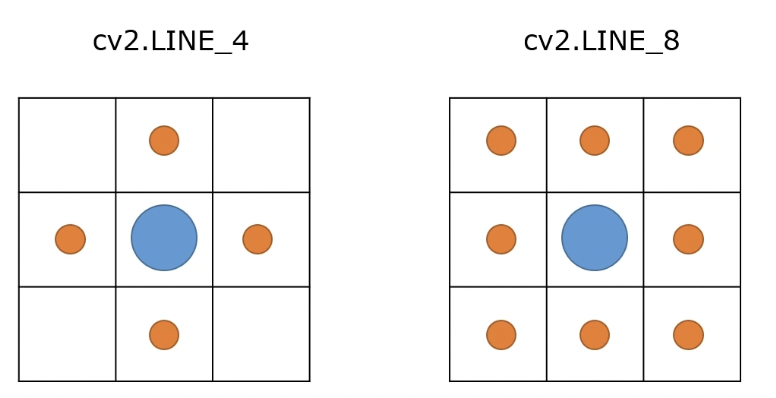

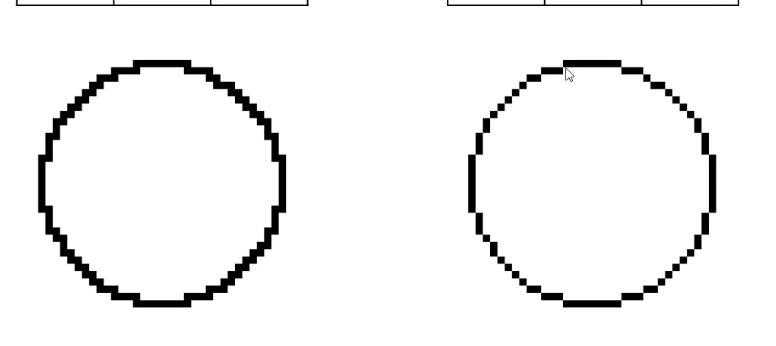

화면을 줄였을 때는 LINE4와 LINE8의 차이는 크지 않다.

### 원

In [14]:
import cv2
import numpy as np
img = np.zeros((480, 640, 3), dtype = np.uint8)
# 안에 채널이 3개 있다. 색을 표현하기 위함임.

COLOR = (0, 255, 255) # BGR 순서
RADIUS = 50 # 반지름
THICKNESS = 3 # 두께

cv2.circle(img, (200,100), RADIUS, COLOR, THICKNESS, cv2.LINE_AA)
# 그릴 위치, 원의 중심점, 반지름, 두께, 선 종류 순으로 입력
# 속이 빈 원을 그려준다.

cv2.circle(img, (400, 100), RADIUS, COLOR, cv2.FILLED, cv2.LINE_AA)
# THICKNESS 부분을 cv2.FILLED로 하거나, -1을 입력해주면 속이 꽉 찬 원이 만들어진다.

cv2.imshow("img", img)
cv2.waitKey(5000)
cv2.destroyAllWindows()

### 사각형

In [17]:
import cv2
import numpy as np
img = np.zeros((480, 640, 3), dtype = np.uint8)

COLOR = (0, 255, 255) # BGR 순서
THICKNESS = 3 # 두께

cv2.rectangle(img, (100,100), (200,200), COLOR, THICKNESS) # 속이 빈 사각형
# 그릴 위치, 왼쪽 위 좌표, 오른쪽 아래 좌표, 색깔 두께

cv2.rectangle(img, (300,100), (400, 300), COLOR, cv2.FILLED)
# 원과 마찬가지

cv2.imshow("img", img)
cv2.waitKey(5000)
cv2.destroyAllWindows()

### 다각형

In [2]:
import cv2
import numpy as np
img = np.zeros((480, 640, 3), dtype = np.uint8)

COLOR = (0, 0, 255) # BGR 순서
THICKNESS = 3 # 두께

# 다각형은 그릴 좌표를 각각 정해주어야 한다.
pts1 = np.array([[100,100], [200,100], [100,200]])
cv2.polylines(img, [pts1], True, COLOR, THICKNESS, cv2.LINE_AA)
# 점들을 리스트로 감싸야 한다.
# 세 번째 False이면 첫 점과 끝 점이 연결되지 않고, True이면 시작점과 끝 점이 연결된다.
cv2.imshow("img", img)
cv2.waitKey(5000)
cv2.destroyAllWindows()

In [7]:
pts2 = np.array([[200, 100], [300, 100], [300, 200]])
cv2.polylines(img, [pts1, pts2], True, COLOR, THICKNESS, cv2.LINE_AA)
# 그릴 위치, 그릴 좌표들, 닫힘 여부, 색깔, 두께, 선 종류
cv2.imshow("img", img)
cv2.waitKey(500)
cv2.destroyAllWindows()

두 번째 인수를 리스트로 넣어주면, 다수의 다각형을 한꺼번에 그릴 수 있다.

In [11]:
pts3 = np.array([[[100,300], [200,300], [100,400]], [[200, 300], [300,300], [300,400]]])
# 지점을 리스트로 감쌀 수도 있다. pts를 인수로 넣을 때 []으로 감싸는 것과 비슷
cv2.fillPoly(img, pts3, COLOR, cv2.LINE_AA)
cv2.imshow("img", img)
cv2.waitKey(500)
cv2.destroyAllWindows()

## 텍스트

### OpenCV에서 사용하는 글꼴 종류

    1. cv2.FONT_HERSHEY_SIMPLEX : 보통 크기의 산 셰리프 글꼴
    2. cv2.FONT_HERSHEY_PLAIN : 작은 크기의 산 셰리프 글꼴
    3. cv2.FONT_HERSHEY_SCRIPT_SIMPLEX : 필기체 스타일 글꼴
    4. cv2.FONT_HERSHEY_TRIPLEX : 보통 크기의 세리프 글꼴
    5. cv2.FONT_ITALIC : 기울림(이텔릭체), 원래 글에 기울임 효과를 준다.

In [18]:
import numpy as np
import cv2

img = np.zeros((480, 630, 3), dtype = np.uint8)
SCALE = 1
COLOR = (255, 255, 255)
THICKNESS = 1

cv2.putText(img, "Nado Simplex", (20,50), cv2.FONT_HERSHEY_SIMPLEX, SCALE, COLOR, THICKNESS)
# 그림 위치, 텍스트 내용, 시작 위치, 폰트 종류, 크기, 색깔, 두께
cv2.putText(img, "Nado Plain", (20,150), cv2.FONT_HERSHEY_PLAIN, SCALE, COLOR, THICKNESS)
cv2.putText(img, "Nado Scropt Simplex", (20,250), cv2.FONT_HERSHEY_SCRIPT_SIMPLEX, SCALE, COLOR, THICKNESS)
cv2.putText(img, "Nado Triplex", (20,350), cv2.FONT_HERSHEY_TRIPLEX, SCALE, COLOR, THICKNESS)
cv2.putText(img, "Nado Italic", (20,450), cv2.FONT_HERSHEY_SIMPLEX | cv2.FONT_ITALIC, SCALE, COLOR, THICKNESS)

cv2.imshow("img", img)
cv2.waitKey(500)
cv2.destroyAllWindows()

SCALE(크기), COLOR(색깔), THICKNESS(굵기)를 자유자재로 조절할 수 있다.

### 한글 우회 방법

OpenCV에서는 한글을 지원하지 않기 때문에 한글 텍스트를 쓰려면 우회해야 한다.

In [3]:
import numpy as np
import cv2
from PIL import ImageFont, ImageDraw, Image

def myPutText(src, text, pos, font_size, font_color):
    img_pil = Image.fromarray(src)
    draw = ImageDraw.Draw(img_pil)
    font = ImageFont.truetype("gulim.ttc", font_size)
    draw.text(pos, text, font = font, fill = font_color)
    return np.array(img_pil)
# 이 코드를 정확히 알 필요는 없음

img = np.zeros((480, 630, 3), dtype = np.uint8)
FONT_SIZE = 30
COLOR = (255, 255, 255)
THICKNESS = 1

img = myPutText(img, "나도코딩", (20, 50), FONT_SIZE, COLOR)
# 그림 위치, 텍스트 내용, 시작 위치, 폰트 종류, 크기, 색깔, 두께

cv2.imshow("img", img)
cv2.waitKey(500)
cv2.destroyAllWindows()

## 파일 저장

### 이미지 저장

OpenCV을 활용해 도형을 편집하고, 그 결과물을 저장해보자.

In [12]:
import cv2
import os, sys
import cv2
os.chdir("/Users/choeunsol/Python/나도코딩 - 파이썬 스터디/opencv")
sys.path.append(os.pardir)

img = cv2.imread("img1.jpeg", cv2.IMREAD_GRAYSCALE)
cv2.imshow("img", img)
cv2.waitKey(100)
cv2.destroyAllWindows()

result = cv2.imwrite("img_save.jpeg", img)
print(result)

True


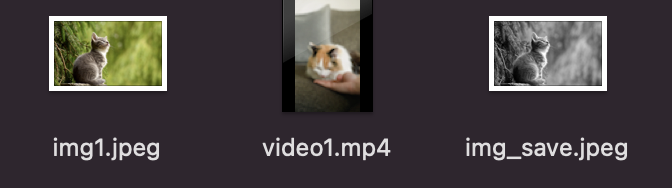

이렇게 저장되는 것을 확인할 수 있다.

확장자는 jpg, png 등으로도 저장 가능. 이미지 처리한 결과물을 이런 식으로 저장해준다.

### 동영상 저장 

In [16]:
import cv2
cap = cv2.VideoCapture('video1.mp4')

# 코덱 정의
fourcc = cv2.VideoWriter_fourcc(* 'DIVX')
# fourcc = cv2.VideoWriter_fourcc('D', 'I', 'V', 'X')
# 앞에 *을 붙이면 요소 하나하나를 분리한다.

# 프레임 크기, FPS 정의
width = round(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = round(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
# 정수 값으로 가져와야 하기 때문에 round 함수를 사용한다.
fps = cap.get(cv2.CAP_PROP_FPS) # fps는 동영상의 속도, *2를 하면 재생 속도가 2배가 된다.

out = cv2.VideoWriter("output.avi", fourcc, fps, (width, height))
# 저장 파일 명, 코덱, FPS, 크기(width, height)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    out.write(frame) # 영상 데이터만 저장 (소리 X)
    cv2.imshow('video', frame)
    if cv2.waitKey(1) == ord('q'):
        break

out.release()
cap.release()
cv2.destroyAllWindows()

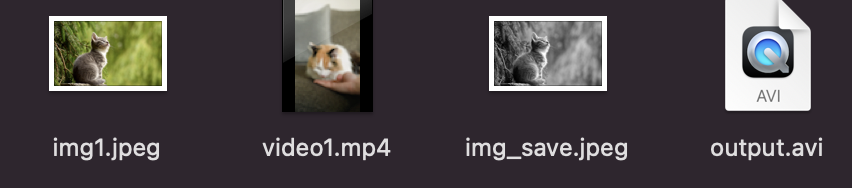